In [1]:
from my_libs_py3 import *

/home/ken/miniconda3/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
pd.set_option('display.max_rows', 500)

## Action

In [3]:
robinhood = robingateway()

In [4]:
mongod = mongo("all_symbol")

fun_table = mongod.conn.get_data("SELECT * FROM all_symbol.`ScreenerModel_TOS`")

Connection Successful


In [7]:
len(fun_table)

2581

In [9]:
fun_table["sum_rank"] = fun_table["P/Cash"] + fun_table["Analyst Recom"]  + fun_table["P/S"] + fun_table["Total Debt/Equity"] + fun_table["P/Free Cash Flow"] + fun_table["P/E"] + fun_table["Insider Ownership"] + fun_table["Gross Margin"] + fun_table["Current Ratio"] + fun_table["Sales growth quarter over quarter"] + fun_table["Profit Margin"] + fun_table["Quick Ratio"] + fun_table["Performance (Week)"] + fun_table["Institutional Ownership"] + fun_table["EPS (ttm)"] + fun_table["Operating Margin"]

fun_table["avg_rank"] = (fun_table["P/Cash"] + fun_table["Analyst Recom"]  + fun_table["P/S"] + fun_table["Total Debt/Equity"] + fun_table["P/Free Cash Flow"] + fun_table["P/E"] + fun_table["Insider Ownership"] + fun_table["Gross Margin"] + fun_table["Current Ratio"] + fun_table["Sales growth quarter over quarter"] + fun_table["Profit Margin"] + fun_table["Quick Ratio"] + fun_table["Performance (Week)"] + fun_table["Institutional Ownership"] + fun_table["EPS (ttm)"] + fun_table["Operating Margin"])/21

In [13]:
fun_table.sort_values("sum_rank")

,Ticker,Sector,Industry,Refresh_Date,P/Cash,Analyst Recom,P/S,Total Debt/Equity,P/Free Cash Flow,P/E,Insider Ownership,Gross Margin,Current Ratio,Sales growth quarter over quarter,Profit Margin,Quick Ratio,Performance (Week),Institutional Ownership,EPS (ttm),Operating Margin,sum_rank,avg_rank
738,ELP,Utilities,Utilities - Diversified,2020-10-16 13:01:05,9.0000,45.0000,10.0000,7.0000,6.0000,5.0000,3.0000,50.0000,12.0000,5.0000,12.0000,11.0000,10.0000,69.0000,42.0000,21.0000,317.0000,15.0952
1669,NRG,Utilities,Utilities - Independent Power Producers,2020-10-16 13:01:05,28.0000,10.0000,9.0000,71.0000,7.0000,3.0000,19.0000,51.0000,13.0000,58.0000,2.0000,12.0000,6.0000,1.0000,2.0000,56.0000,348.0000,16.5714
2159,SRE,Utilities,Utilities - Diversified,2020-10-16 13:01:05,15.0000,30.0000,52.0000,42.0000,26.0000,29.0000,76.0000,3.0000,42.0000,9.0000,3.0000,29.0000,20.0000,11.0000,4.0000,11.0000,402.0000,19.1429
1894,PRDO,Consumer Defensive,Education & Training Services,2020-10-16 13:01:05,10.0000,9.0000,61.0000,15.0000,12.0000,10.0000,45.0000,1.0000,18.0000,31.0000,16.0000,8.0000,79.0000,13.0000,77.0000,18.0000,423.0000,20.1429
2041,SBS,Utilities,Utilities - Regulated Water,2020-10-16 13:01:05,16.0000,14.0000,24.0000,12.0000,8.0000,13.0000,6.0000,44.0000,33.0000,10.0000,42.0000,20.0000,31.0000,75.0000,69.0000,7.0000,424.0000,20.1905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,ZCMD,Healthcare,Health Information Services,2020-10-16 13:01:05,44.0000,nan,73.0000,51.0000,154.0000,18.0000,9.0000,55.0000,39.0000,36.0000,29.0000,32.0000,183.0000,nan,170.0000,42.0000,nan,nan
2573,ZEAL,Healthcare,Biotechnology,2020-10-16 13:01:05,nan,117.0000,nan,nan,nan,32.0000,nan,nan,nan,2.0000,nan,nan,134.0000,173.0000,66.0000,nan,nan,nan
2574,ZION,Financial,Banks - Regional,2020-10-16 13:01:05,254.0000,369.0000,238.0000,323.0000,225.0000,398.0000,390.0000,nan,nan,577.0000,329.0000,nan,660.0000,58.0000,221.0000,27.0000,nan,nan
2575,ZKIN,Basic Materials,Steel,2020-10-16 13:01:05,71.0000,nan,9.0000,41.0000,nan,9.0000,4.0000,98.0000,90.0000,5.0000,59.0000,90.0000,57.0000,118.0000,107.0000,80.0000,nan,nan


In [23]:
price = get_price_data(["ELP"],method = 'day',back_day=7)

All price data of Close is actually Adj Close
Connection Successful
No active exception to reraise
switching to realtimeday method
All price data of Close is actually Adj Close
('Finished', 'ELP')
('Finished', 'ELP')


In [24]:
price.Close.mean()

11.744

In [25]:
realtimequote("ELP").price.iloc[0]

11.59

In [22]:
price

,index,TimeStamp,Open,High,Low,Close,adjClose,Volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Ticker,Return,Fwd_Return
0,21,2020-09-17,12.4600,12.6700,12.3800,12.5400,12.5400,"376,600.0000","376,600.0000",0.0800,0.6420,12.5300,"September 17, 20",0.0064,ELP,nan,-0.0625
1,20,2020-09-18,12.4700,12.4800,11.7800,11.7800,11.7800,"471,500.0000","471,500.0000",-0.6900,-5.5330,12.0133,"September 18, 20",-0.0553,ELP,-0.0645,0.0059
2,19,2020-09-21,11.5100,12.0100,11.4600,11.8500,11.8500,"542,500.0000","542,500.0000",0.3400,2.9540,11.7733,"September 21, 20",0.0295,ELP,0.0059,-0.0127
3,18,2020-09-22,12.0700,12.1300,11.6100,11.7000,11.7000,"378,100.0000","378,100.0000",-0.3700,-3.0650,11.8133,"September 22, 20",-0.0307,ELP,-0.0128,-0.0321
4,17,2020-09-23,11.6700,11.7700,11.3000,11.3300,11.3300,"697,400.0000","697,400.0000",-0.3400,-2.9130,11.4667,"September 23, 20",-0.0291,ELP,-0.0327,0.0449
5,16,2020-09-24,11.4300,12.1000,11.3300,11.8500,11.8500,"726,600.0000","726,600.0000",0.4200,3.6750,11.7600,"September 24, 20",0.0367,ELP,0.0439,-0.0274
6,15,2020-09-25,11.5600,11.6700,11.2500,11.5300,11.5300,"1,649,800.0000","1,649,800.0000",-0.0300,-0.2600,11.4833,"September 25, 20",-0.0026,ELP,-0.0278,-0.0525
7,14,2020-09-28,11.5400,11.5800,10.8400,10.9400,10.9400,"578,500.0000","578,500.0000",-0.6000,-5.1990,11.1200,"September 28, 20",-0.0520,ELP,-0.0539,0.0009
8,13,2020-09-29,10.8000,11.0600,10.7000,10.9500,10.9500,"629,900.0000","629,900.0000",0.1500,1.3890,10.9033,"September 29, 20",0.0139,ELP,0.0009,0.0064
9,12,2020-09-30,10.9700,11.1200,10.8000,11.0200,11.0200,"508,600.0000","508,600.0000",0.0500,0.4560,10.9800,"September 30, 20",0.0046,ELP,0.0064,-0.0045


In [ ]:
money = 50
for i in target_list:
    price = get_price_data([i],method = 'day',back_day=7)
    size = money
    if realtimequote(i).price.iloc[0] < price.Close.mean():
            if robinhood.place_sell_bulk_checkup(ticker_list=[i],quantity_list=[log["size"].iloc[-1]])== "Trade Success!":
                        log_trade(i,-log["size"].sum(), robinhood.get_last_price(i), strategy_name)
                        send_email("manual_cutloss sell")

In [5]:
st= pd.DataFrame(mongod.db["Stocks_info"].find())

In [10]:
#get best of each industry
new = pd.DataFrame()
for i in set(st.Industry):
    if i is None:
        continue
    temp = st[st.Industry == i].sort_values("Sharp_Ratio20",ascending = False ).iloc[0]
    new = new.append(temp)
temp = st[st.Industry != st.Industry].sort_values("Sharp_Ratio20",ascending = False ).iloc[0]
new = new.append(temp)

In [20]:
new.to_csv("file/rotation_suggestion.csv")

In [16]:
read_mongo_time(st.Refresh_Date.iloc[0]).date()

datetime.date(2020, 2, 23)

In [17]:
pd.read_csv("file/blacklist.csv").Ticker.to_list()

['HOME', 'DIVC']

In [30]:
get = pd.DataFrame()
for ind in list(set(all_stocks.Industry)):
    try:
        get = get.append(all_stocks[(all_stocks.Industry == ind) & all_stocks.PEG > 0  ].sort_values("PEG").iloc[0])
    except:
        print ("error %s"%ind)

error nan
error Networking & Communication Devices
error Manufactured Housing
error Internet Service Providers
error Consumer Services
error Exchange Traded Fund
error Computer Based Systems
error Semiconductor- Memory Chips
error Silver
error Closed-End Fund - Foreign
error Basic Materials Wholesale
error Tobacco Products, Other


All price data of Close is actually Adj Close
Connection Successful
('Finished', 'ABT')


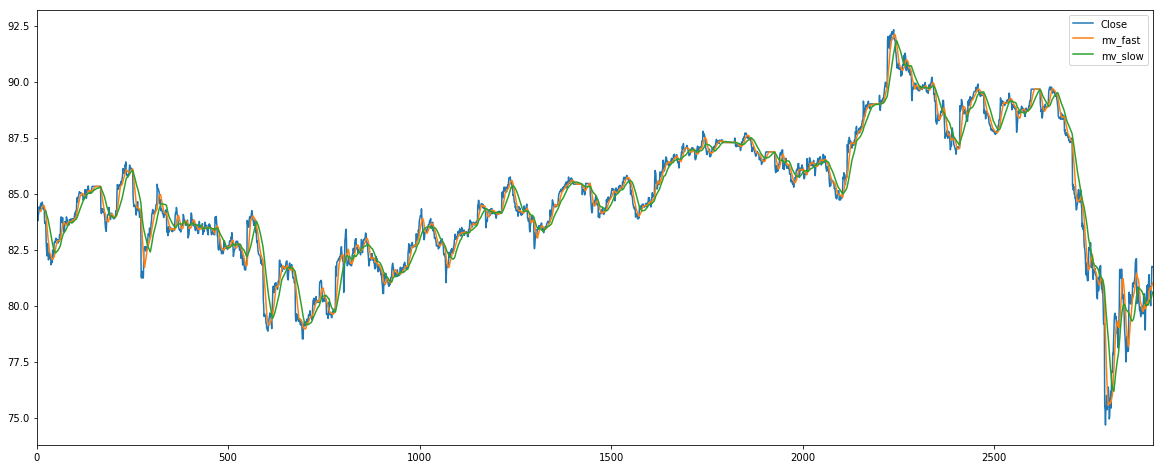

In [4]:
plot_ticker("ABT",method="self_minute", robinhood = robingateway(),past_days=200)

Stock analysis function:

- volatility
- basic price movement info
- ranking in sector and industry for important indicators
- graph

## Below test area

In [4]:
mongod = mongo("all_symbol")
info = pd.DataFrame(mongod.db["Stocks_info"].find())

Connection Successful


In [12]:
info.set_index("Ticker")[["Sharp_Ratio20"]]

,Sharp_Ratio20
Ticker,
CFRUY,NaN
BRDCY,NaN
BXBLY,0.068405
SUBCY,-0.084217
NNA,0.088461
IGD,0.022719
GABC,0.104342
ERH,-0.096427
ACC,-0.157050
